In [17]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from statistics import mean
from apyori import apriori
import matplotlib.pyplot as plt

df = pd.read_csv("./Dataset/Train_HR_Employee_Attrition.csv")

In [18]:
#SETTING TRAINING SET (as executed in DataUnderstanding-attrition)


#MISSING VALUES

#infer Gender by Gender mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

#infer BusinessTravel by BusinessTravel mode
df['BusinessTravel']=df['BusinessTravel'].fillna(df['BusinessTravel'].mode()[0])

#infer PerformanceRating by PerformanceRating mode
df['PerformanceRating'] = df['PerformanceRating'].fillna(df['PerformanceRating'].mode()[0])

#infer YearsAtCompany by YearsAtCompany mean
df['YearsAtCompany'] = df['YearsAtCompany'].fillna(df['YearsAtCompany'].median())

#infer MonthlyIncome by mean grouped by YearsAtCompany-Quartiles
bins = pd.qcut(df['YearsAtCompany'],[0,0.25,0.50,0.75,1.0])
df['MonthlyIncome'] = df['MonthlyIncome'].groupby(bins).apply(
                      lambda x: x.fillna(x.mean()))

#infer Age by mean grouped by MonthlyIncome-quartiles
bins = pd.qcut(df['MonthlyIncome'],[0,0.25,0.50,0.75,1.0])
df['Age'] = df['Age'].groupby(bins).apply(lambda x: x.fillna(x.mean()))

#TrainingTimesLastYear by fillna with TrainingTimesLastYear values probability
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].fillna(df['TrainingTimesLastYear'].mode()[0])


#OUTLIERS
df["MonthlyIncomeTrans"] = np.log(df['MonthlyIncome'])


#DIENSIONALITY REDUCTION
df['YearsMean'] = None
for index, row in df.iterrows(): 
    df.loc[index, 'YearsMean'] = mean((row['YearsInCurrentRole'], row['YearsSinceLastPromotion'], row['YearsWithCurrManager']))

df = df.drop(columns = ['YearsInCurrentRole', 'YearsWithCurrManager', 'Over18','StandardHours', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'YearsSinceLastPromotion'], axis = 'columns')

In [19]:
#attributi numerici
num_attr= ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncomeTrans','MonthlyRate','NumCompaniesWorked',
           'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsMean',]

#attributi categorici
cat_attr = ['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction',
            'Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','OverTime',
            'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'MonthlyIncomeTrans', 'YearsMean'],
      dtype='object')

In [20]:
#Binning non-categorical attributes 
df['Age'] = pd.qcut(df['Age'], q=4)
df['DistanceFromHome'] = pd.qcut(df['DistanceFromHome'], q=4)
df['MonthlyIncomeTrans'] = pd.qcut(df['MonthlyIncomeTrans'], q=4)
df['NumCompaniesWorked'] = pd.qcut(df['NumCompaniesWorked'], q=4)
df['TotalWorkingYears'] = pd.qcut(df['TotalWorkingYears'], q=4, duplicates = 'drop')
df['TrainingTimesLastYear'] = pd.qcut(df['TrainingTimesLastYear'], q=4, duplicates='drop')
df['YearsAtCompany'] = pd.qcut(df['YearsAtCompany'], q=4)
df['YearsMean'] = pd.qcut(df['YearsMean'], q=4)

In [21]:
#Converting int values in string 
df['DistanceFromHome'] = 'DistanceFromHome:' + df['DistanceFromHome'].astype(str)
df['Education'] = 'Education:' + df['Education'].astype(str)
df['EnvironmentSatisfaction'] = 'EnvironmentSatisfaction:' + df['EnvironmentSatisfaction'].astype(str)
df['JobInvolvement'] = 'JobInvolvement:' + df['JobInvolvement'].astype(str)
df['JobLevel'] = 'JobLevel:' + df['JobLevel'].astype(str)
df['JobSatisfaction'] = 'JobSatisfaction:' + df['JobSatisfaction'].astype(str)
df['MonthlyIncomeTrans'] = 'MonthlyIncomeTrans:' + df['MonthlyIncomeTrans'].astype(str)
df['NumCompaniesWorked'] = 'NumCompaniesWorked:' + df['NumCompaniesWorked'].astype(str)
df['PerformanceRating'] = 'PerformanceRating:' + df['PerformanceRating'].astype(str)
df['RelationshipSatisfaction'] = 'RelationshipSatisfaction:' + df['RelationshipSatisfaction'].astype(str)
df['StockOptionLevel'] = 'StockOptionLevel:' + df['StockOptionLevel'].astype(str)
df['TotalWorkingYears'] = 'TotalWorkingYears:' + df['TotalWorkingYears'].astype(str)
df['TrainingTimesLastYear'] = 'TrainingTimesLastYear:' + df['TrainingTimesLastYear'].astype(str)
df['WorkLifeBalance'] = 'WorkLifeBalance:' + df['WorkLifeBalance'].astype(str)
df['YearsAtCompany'] = 'YearsAtCompany:' + df['YearsAtCompany'].astype(str)
df['YearsMean'] = 'YearsMean:' + df['YearsMean'].astype(str)

df.to_csv("./Dataset/AR.csv", header=False, index=False)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,MonthlyIncomeTrans,YearsMean
0,"(43.0, 60.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(7.0, 14.0]",Education:4,Medical,EnvironmentSatisfaction:2,Male,JobInvolvement:3,...,No,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:0,"TotalWorkingYears:(15.0, 40.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:2,"YearsAtCompany:(5.0, 9.0]","MonthlyIncomeTrans:(8.985, 9.903]","YearsMean:(5.333, 14.333]"
1,"(31.0, 36.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(0.999, 2.0]",Education:1,Life Sciences,EnvironmentSatisfaction:2,Male,JobInvolvement:3,...,Yes,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:1,"TotalWorkingYears:(15.0, 40.0]","TrainingTimesLastYear:(2.0, 3.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","MonthlyIncomeTrans:(8.146, 8.564]","YearsMean:(2.333, 5.333]"
2,"(31.0, 36.0]",No,Travel_Frequently,Sales,"DistanceFromHome:(14.0, 29.0]",Education:3,Life Sciences,EnvironmentSatisfaction:3,Male,JobInvolvement:3,...,Yes,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:1,"TotalWorkingYears:(6.0, 10.0]","TrainingTimesLastYear:(3.0, 6.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","MonthlyIncomeTrans:(8.146, 8.564]","YearsMean:(2.333, 5.333]"
3,"(31.0, 36.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(2.0, 7.0]",Education:4,Technical Degree,EnvironmentSatisfaction:2,Male,JobInvolvement:3,...,No,PerformanceRating:3.0,RelationshipSatisfaction:2,StockOptionLevel:0,"TotalWorkingYears:(10.0, 15.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","MonthlyIncomeTrans:(6.9159999999999995, 8.146]","YearsMean:(2.333, 5.333]"
4,"(36.0, 43.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(7.0, 14.0]",Education:2,Life Sciences,EnvironmentSatisfaction:3,Female,JobInvolvement:3,...,No,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:0,"TotalWorkingYears:(-0.001, 6.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:3,"YearsAtCompany:(9.0, 40.0]","MonthlyIncomeTrans:(8.564, 8.985]","YearsMean:(1.333, 2.333]"


In [99]:
# splitted[0]['toPredict'] = np.where((np.logical_and(
#     df['PerformanceRating'] == 'PerformanceRating:3.0', 
#     df['MaritalStatus'] == 'Single',
#     df['StockOptionLevel'] == 'StockOptionLevel:0')), str('No'), str('Yes'))
# df['toPredict'] = np.where((np.logical_and(
#     df['NumCompaniesWorked'] == 'NumCompaniesWorked:(-0.001, 1.00]',
#     df['TotalWorkingYears'] == 'TotalWorkingYears:(-0.001, 6.0]'
# )))

predicted = list()
for item in df.iterrows(): 
    if item[1]['PerformanceRating'] == 'PerformanceRating:3.0' or item[1]['MaritalStatus'] == 'Single' or item[1]['StockOptionLevel'] == 'StockOptionLevel:0' or item[1]['NumCompaniesWorked'] == 'NumCompaniesWorked:(-0.001, 1.0]' or item[1]['TotalWorkingYears'] == 'TotalWorkingYears:(-0.001, 1.0]': 
        predicted.append('No')
    else: 
        predicted.append('Yes')

In [105]:
tn = 0 
tp = 0
fn = 0 
fp = 0
actual = df['Attrition'].values.tolist()

for i in range(1, len(predicted)):
    if actual[i] == predicted[i]: 
        if actual[i] == 'Yes': 
            tp = tp + 1
        else: 
            tn = tn + 1
    else:
        if predicted[i] == 'Yes':
            fp = fp + 1
        else: 
            fn = fn + 1
        
print(tp, tn, fp, fn)

8 943 40 184


In [2]:
length = list()
array = pd.read_csv("./Dataset/AR.csv", header=None)

In [20]:
itemsets = apriori(array.values.tolist(), min_support=0.1, min_confidence=0.3, min_lift=3, min_length=4)
ar = list(itemsets)
results = []
for e in ar: 
    results.append({
        'values': e[0],
        'confidence': e[2][0][2], 
        'lift': e[2][0][3]})
results

[{'values': frozenset({'Marketing', 'Sales'}),
  'confidence': 1.0,
  'lift': 3.2576177285318564},
 {'values': frozenset({'Sales', 'Sales Executive'}),
  'confidence': 0.7229916897506926,
  'lift': 3.2576177285318564},
 {'values': frozenset({'JobInvolvement:3', 'Sales', 'Sales Executive'}),
  'confidence': 0.42659279778393355,
  'lift': 3.257617728531856},
 {'values': frozenset({'JobLevel:2', 'Sales', 'Sales Executive'}),
  'confidence': 0.5235457063711912,
  'lift': 3.2576177285318564},
 {'values': frozenset({'Male', 'Sales', 'Sales Executive'}),
  'confidence': 0.46537396121883656,
  'lift': 3.257617728531856},
 {'values': frozenset({'Married', 'Sales', 'Sales Executive'}),
  'confidence': 0.3490304709141274,
  'lift': 3.257617728531856},
 {'values': frozenset({'No', 'Sales', 'Sales Executive'}),
  'confidence': 0.6565096952908588,
  'lift': 3.2576177285318564},
 {'values': frozenset({'NumCompaniesWorked:(-0.001, 1.0]',
             'Sales',
             'Sales Executive'}),
  'confi

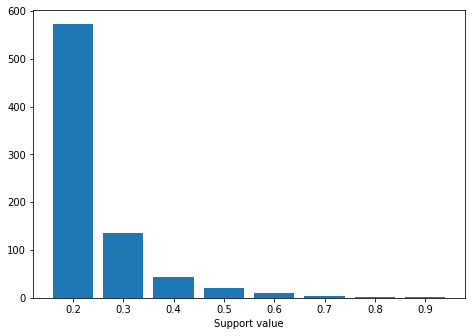

In [82]:
import matplotlib.pyplot as plt

for i in np.arange(0.1, 1, 0.1):
    itemsets = apriori(array.values.tolist(), min_support=i)
    ar = list(itemsets)
    length.append(len(ar))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
plt.xlabel('Support value')
ax.bar(langs,length[1:9])
plt.show()

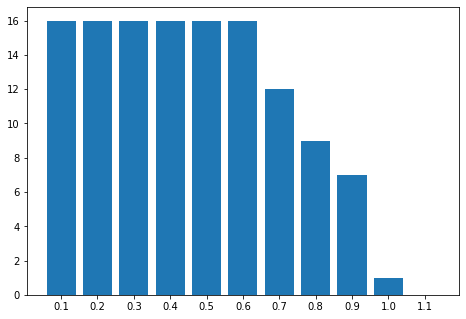

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0', '1.1']
ax.bar(langs,length)
plt.show()

In [15]:
length = list()
array = pd.read_csv("./Dataset/AR.csv", header=None)
    
for i in np.arange(1, 1.09, 0.01):
    itemsets = apriori(array.values.tolist(), min_support=0.3, min_confidence=0.9, min_lift=i, min_length=2)
    ar = list(itemsets)
    length.append(len(ar))

length

[47, 21, 11, 7, 4, 4, 1, 1, 1, 1]

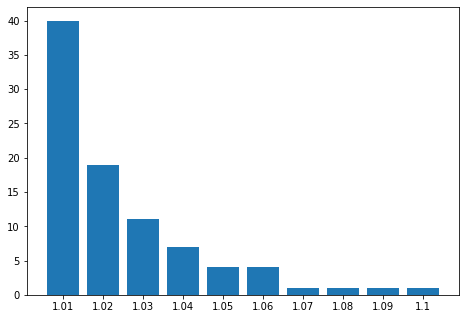

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['1.01', '1.02', '1.03', '1.04', '1.05', '1.06', '1.07', '1.08', '1.09', '1.1']
ax.bar(langs,length)
plt.show()

In [16]:
array

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,"(43.0, 60.0]",No,Travel_Rarely,"DailyRate:(460.5, 804.0]",Research & Development,"DistanceFromHome:(7.0, 14.0]",Education:4,Medical,EnvironmentSatisfaction:2,Male,...,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:0,"TotalWorkingYears:(15.0, 40.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:2,"YearsAtCompany:(5.0, 9.0]","YearsSinceLastPromotion:(1.0, 3.0]","MonthlyIncomeTrans:(8.985, 9.903]","YearsMean:(5.333, 14.333]"
1,"(31.0, 36.0]",No,Travel_Rarely,"DailyRate:(1169.0, 1499.0]",Research & Development,"DistanceFromHome:(0.999, 2.0]",Education:1,Life Sciences,EnvironmentSatisfaction:2,Male,...,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:1,"TotalWorkingYears:(15.0, 40.0]","TrainingTimesLastYear:(2.0, 3.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","YearsSinceLastPromotion:(-0.001, 1.0]","MonthlyIncomeTrans:(8.146, 8.564]","YearsMean:(2.333, 5.333]"
2,"(31.0, 36.0]",No,Travel_Frequently,"DailyRate:(460.5, 804.0]",Sales,"DistanceFromHome:(14.0, 29.0]",Education:3,Life Sciences,EnvironmentSatisfaction:3,Male,...,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:1,"TotalWorkingYears:(6.0, 10.0]","TrainingTimesLastYear:(3.0, 6.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","YearsSinceLastPromotion:(-0.001, 1.0]","MonthlyIncomeTrans:(8.146, 8.564]","YearsMean:(2.333, 5.333]"
3,"(31.0, 36.0]",No,Travel_Rarely,"DailyRate:(804.0, 1169.0]",Research & Development,"DistanceFromHome:(2.0, 7.0]",Education:4,Technical Degree,EnvironmentSatisfaction:2,Male,...,PerformanceRating:3.0,RelationshipSatisfaction:2,StockOptionLevel:0,"TotalWorkingYears:(10.0, 15.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","YearsSinceLastPromotion:(-0.001, 1.0]","MonthlyIncomeTrans:(6.9159999999999995, 8.146]","YearsMean:(2.333, 5.333]"
4,"(36.0, 43.0]",No,Travel_Rarely,"DailyRate:(1169.0, 1499.0]",Research & Development,"DistanceFromHome:(7.0, 14.0]",Education:2,Life Sciences,EnvironmentSatisfaction:3,Female,...,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:0,"TotalWorkingYears:(-0.001, 6.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:3,"YearsAtCompany:(9.0, 40.0]","YearsSinceLastPromotion:(1.0, 3.0]","MonthlyIncomeTrans:(8.564, 8.985]","YearsMean:(1.333, 2.333]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,"(36.0, 43.0]",No,Travel_Rarely,"DailyRate:(804.0, 1169.0]",Research & Development,"DistanceFromHome:(14.0, 29.0]",Education:2,Medical,EnvironmentSatisfaction:4,Female,...,PerformanceRating:3.0,RelationshipSatisfaction:2,StockOptionLevel:2,"TotalWorkingYears:(-0.001, 6.0]","TrainingTimesLastYear:(2.0, 3.0]",WorkLifeBalance:2,"YearsAtCompany:(9.0, 40.0]","YearsSinceLastPromotion:(-0.001, 1.0]","MonthlyIncomeTrans:(6.9159999999999995, 8.146]","YearsMean:(-0.001, 1.333]"
1172,"(31.0, 36.0]",Yes,Non-Travel,"DailyRate:(101.999, 460.5]",Sales,"DistanceFromHome:(2.0, 7.0]",Education:4,Life Sciences,EnvironmentSatisfaction:2,Female,...,PerformanceRating:3.0,RelationshipSatisfaction:2,StockOptionLevel:0,"TotalWorkingYears:(10.0, 15.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:2,"YearsAtCompany:(9.0, 40.0]","YearsSinceLastPromotion:(3.0, 15.0]","MonthlyIncomeTrans:(8.146, 8.564]","YearsMean:(5.333, 14.333]"
1173,"(31.0, 36.0]",No,Travel_Rarely,"DailyRate:(460.5, 804.0]",Sales,"DistanceFromHome:(2.0, 7.0]",Education:1,Marketing,EnvironmentSatisfaction:3,Male,...,PerformanceRating:3.0,RelationshipSatisfaction:1,StockOptionLevel:0,"TotalWorkingYears:(-0.001, 6.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:4,"YearsAtCompany:(-0.001, 3.0]","YearsSinceLastPromotion:(-0.001, 1.0]","MonthlyIncomeTrans:(6.9159999999999995, 8.146]","YearsMean:(1.333, 2.333]"
1174,"(43.0, 60.0]",No,Non-Travel,"DailyRate:(1169.0, 1499.0]",Sales,"DistanceFromHome:(2.0, 7.0]",Education:4,Marketing,EnvironmentSatisfacti

In [85]:
to_plot = pd.DataFrame(results)

In [86]:
to_plot.lift.max()

4.660139860139861

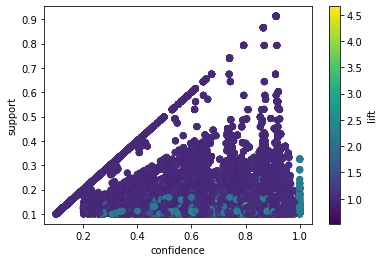

In [87]:
plt.scatter(to_plot['confidence'], to_plot['support'], c=to_plot['lift'], cmap='viridis')
plt.xlabel("confidence")
plt.ylabel("support")
plt.colorbar(label="lift")
plt.show()

In [13]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,MonthlyIncomeTrans,YearsMean,toPredict
0,"(43.0, 60.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(7.0, 14.0]",Education:4,Medical,EnvironmentSatisfaction:2,Male,JobInvolvement:3,...,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:0,"TotalWorkingYears:(15.0, 40.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:2,"YearsAtCompany:(5.0, 9.0]","MonthlyIncomeTrans:(8.985, 9.903]","YearsMean:(5.333, 14.333]",None
1,"(31.0, 36.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(0.999, 2.0]",Education:1,Life Sciences,EnvironmentSatisfaction:2,Male,JobInvolvement:3,...,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:1,"TotalWorkingYears:(15.0, 40.0]","TrainingTimesLastYear:(2.0, 3.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","MonthlyIncomeTrans:(8.146, 8.564]","YearsMean:(2.333, 5.333]",None
2,"(31.0, 36.0]",No,Travel_Frequently,Sales,"DistanceFromHome:(14.0, 29.0]",Education:3,Life Sciences,EnvironmentSatisfaction:3,Male,JobInvolvement:3,...,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:1,"TotalWorkingYears:(6.0, 10.0]","TrainingTimesLastYear:(3.0, 6.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","MonthlyIncomeTrans:(8.146, 8.564]","YearsMean:(2.333, 5.333]",None
3,"(31.0, 36.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(2.0, 7.0]",Education:4,Technical Degree,EnvironmentSatisfaction:2,Male,JobInvolvement:3,...,PerformanceRating:3.0,RelationshipSatisfaction:2,StockOptionLevel:0,"TotalWorkingYears:(10.0, 15.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","MonthlyIncomeTrans:(6.9159999999999995, 8.146]","YearsMean:(2.333, 5.333]",None
4,"(36.0, 43.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(7.0, 14.0]",Education:2,Life Sciences,EnvironmentSatisfaction:3,Female,JobInvolvement:3,...,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:0,"TotalWorkingYears:(-0.001, 6.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:3,"YearsAtCompany:(9.0, 40.0]","MonthlyIncomeTrans:(8.564, 8.985]","YearsMean:(1.333, 2.333]",None
